In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

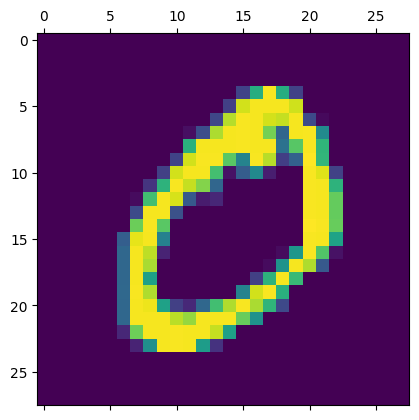

In [13]:
plt.matshow(X_train[1])

In [16]:
y_train[1]

np.uint8(0)

In [24]:
#scaling the data to a range of 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [26]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [48]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

/home/dataopske/Desktop/machine-learning-ii/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


2025-10-01 15:19:51.632845: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9215 - loss: 0.2768
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9631 - loss: 0.1265
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9738 - loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9791 - loss: 0.0677
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0524


In [49]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.0895


[0.08954412490129471, 0.97079998254776]

In [50]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[6.7844717e-03, 1.0320759e-02, 1.2363617e-01, ..., 9.9998379e-01,
        9.5884643e-02, 4.5007169e-01],
       [6.4175040e-03, 9.9629778e-01, 9.9999988e-01, ..., 1.3242142e-06,
        7.4927294e-01, 1.0146829e-07],
       [5.2394019e-03, 9.9892044e-01, 5.3970116e-01, ..., 3.2187057e-01,
        3.8444000e-01, 1.2140327e-02],
       ...,
       [1.1876909e-05, 1.4890770e-06, 3.7419031e-06, ..., 4.3269384e-01,
        8.5250545e-01, 9.8383898e-01],
       [1.6332628e-02, 6.8205604e-03, 8.8243898e-05, ..., 1.6572447e-04,
        9.5044255e-01, 6.8341983e-03],
       [3.3984728e-02, 1.5682483e-01, 4.6115555e-02, ..., 6.5426053e-07,
        7.6373316e-02, 3.8643973e-04]], shape=(10000, 10), dtype=float32)

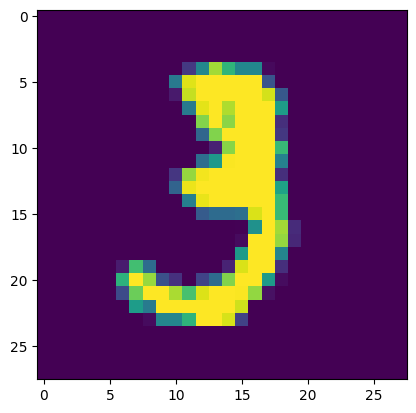

In [51]:
plt.imshow(X_train[10])

In [52]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
y_pred[10]

array([9.9999511e-01, 2.8155930e-04, 2.4458170e-01, 1.8097648e-02,
       1.9318551e-04, 1.9713918e-02, 4.2446912e-03, 3.0307677e-02,
       4.1845264e-03, 2.7600771e-01], dtype=float32)

In [54]:
np.argmax(y_pred[10])

np.int64(0)

In [55]:
y_predicted_values = [np.argmax(i) for i in y_pred]
y_predicted_values[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_values)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    4,    1,    1,    1,    3,    0],
       [   0, 1128,    2,    1,    0,    0,    2,    0,    2,    0],
       [   5,    3,  983,   15,    6,    0,    1,    6,   13,    0],
       [   0,    2,    3,  985,    1,    9,    0,    2,    4,    4],
       [   1,    0,    5,    0,  974,    0,    1,    0,    0,    1],
       [   2,    1,    0,    8,    2,  869,    3,    0,    6,    1],
       [   5,    2,    1,    2,    6,    5,  932,    0,    5,    0],
       [   3,    7,   10,    7,    6,    0,    0,  980,    7,    8],
       [   4,    1,    2,    7,    5,    3,    3,    1,  946,    2],
       [   3,    7,    0,    7,   35,    4,    0,    1,   10,  942]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

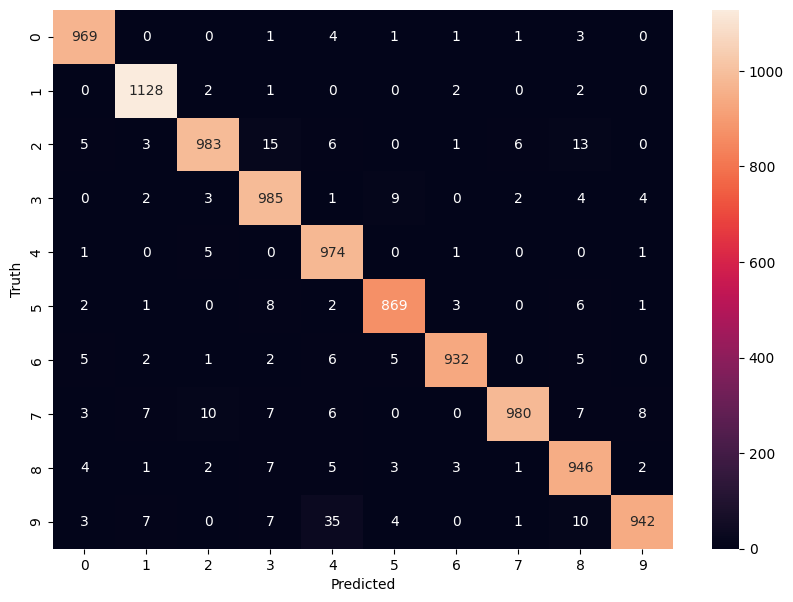

In [58]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #automatically flattens the array
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

/home/dataopske/Desktop/machine-learning-ii/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2025-10-01 17:15:22.925203: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9224 - loss: 0.2746
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9628 - loss: 0.1271
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9739 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9796 - loss: 0.0670
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9834 - loss: 0.0527
